In [17]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import shap
shap.initjs()

import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df_train = pd.read_csv('all/train_V2.csv', index_col='Id')

### Delete Missing Value

In [3]:
df_train.dropna(subset=['winPlacePerc'], inplace=True)

### Train Test Split

In [4]:
X_all = df_train.drop(columns=['winPlacePerc', 'groupId', 'matchId'])
y_all = df_train.winPlacePerc

In [5]:
X_all['matchType'] = X_all['matchType'].astype('category')
X_all = pd.get_dummies(X_all)

In [7]:
X_all.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)


In [18]:
rf_reg = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
rf_reg.fit(X_train.head(10000), y_train.head(10000))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
y_pred = rf_reg.predict(X_test.head(500))

In [8]:
#xgb_reg = XGBRegressor(eval_metric='mae', n_jobs=4)
#xgb_reg.fit(X_train, y_train, 
#            eval_set=[(X_train, y_train), (X_test, y_test)], 
#            eval_metric='mae',)

[0]	validation_0-mae:0.247562	validation_1-mae:0.247431
[1]	validation_0-mae:0.22829	validation_1-mae:0.228171
[2]	validation_0-mae:0.211192	validation_1-mae:0.21108
[3]	validation_0-mae:0.195888	validation_1-mae:0.19578
[4]	validation_0-mae:0.182436	validation_1-mae:0.182325
[5]	validation_0-mae:0.170713	validation_1-mae:0.170614
[6]	validation_0-mae:0.160373	validation_1-mae:0.160279
[7]	validation_0-mae:0.15105	validation_1-mae:0.150954
[8]	validation_0-mae:0.142763	validation_1-mae:0.142677
[9]	validation_0-mae:0.135666	validation_1-mae:0.135588
[10]	validation_0-mae:0.129084	validation_1-mae:0.129005
[11]	validation_0-mae:0.123465	validation_1-mae:0.123393
[12]	validation_0-mae:0.1185	validation_1-mae:0.118437
[13]	validation_0-mae:0.11393	validation_1-mae:0.113865
[14]	validation_0-mae:0.110024	validation_1-mae:0.109962
[15]	validation_0-mae:0.106662	validation_1-mae:0.10661
[16]	validation_0-mae:0.103426	validation_1-mae:0.103381
[17]	validation_0-mae:0.100833	validation_1-mae:0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

## Evaluation

In [ ]:
#y_pred = xgb_reg.predict(X_test)

In [22]:
y_pred = rf_reg.predict(X_test.head(500))

y_pred[y_pred>1] = 1
y_pred[y_pred<0] = 0

mean_absolute_error(y_test.head(500), y_pred)

0.07660515126206079

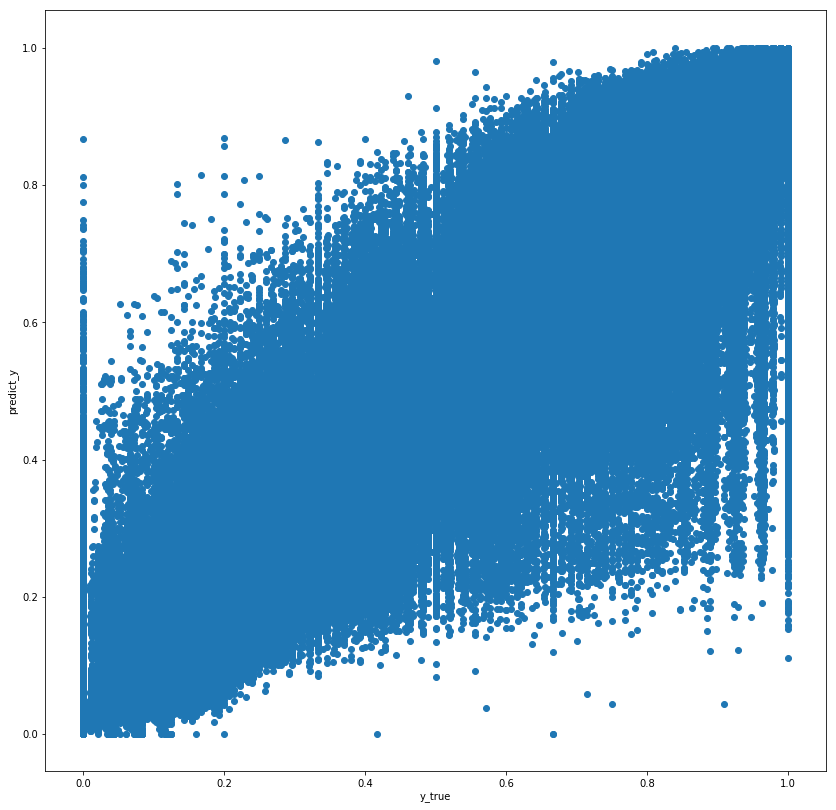

In [10]:
f, ax = plt.subplots(figsize=(14, 14))
plt.scatter(y_test, y_pred)
plt.xlabel("y_true")
plt.ylabel("predict_y")
plt.show()

### Feature Importance

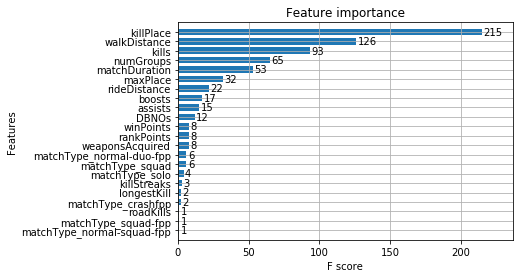

In [11]:
plot_importance(xgb_reg, height=0.7)
plt.show()

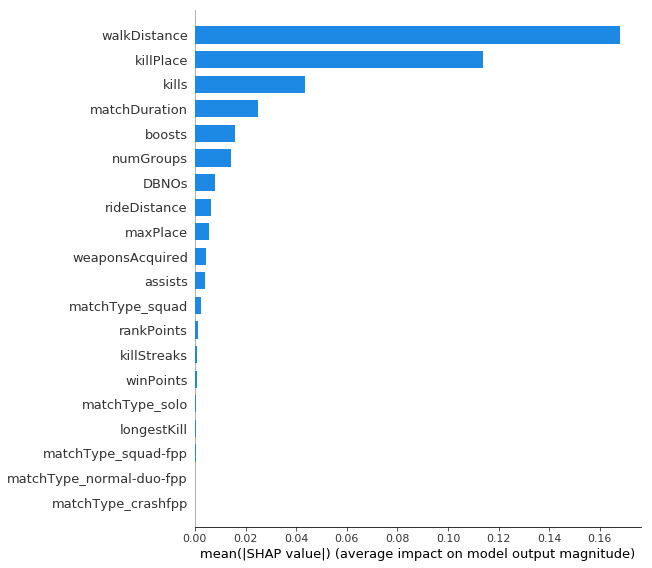

In [12]:
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")


In [15]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [16]:
shap.summary_plot(shap_values, X_train)

KeyboardInterrupt: 